## K-means Clustering

In [52]:
### Importing the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [70]:
dataset = pd.read_excel('Jumlah Penduduk.xlsx')
X = dataset.iloc[3:39, 1:10].values

In [71]:
X

array([['2\u2009221,4', '2\u2009195,4', '2\u2009169,3', '2\u2009193,1',
        '2\u2009166,6', '2\u2009139,9', '4\u2009414,4', '4\u2009362,0',
        '4\u2009309,2'],
       ['6\u2009557,9', '6\u2009470,2', '6\u2009381,1', '6\u2009337,4',
        '6\u2009244,1', '6\u2009149,7', '12\u2009895,3', '12\u2009714,3',
        '12\u2009530,8'],
       ['1\u2009015,2', '1\u2009004,5', '993,6', '979,1', '967,2',
        '955,0', '1\u2009994,3', '1\u2009971,8', '1\u2009948,6'],
       ['1\u2009935,4', '1\u2009911,3', '1\u2009887,3', '1\u2009983,8',
        '1\u2009957,3', '1\u2009931,0', '3\u2009919,2', '3\u2009868,6',
        '3\u2009818,3'],
       ['5\u2009267,8', '5\u2009241,1', '5\u2009212,6', '5\u2009308,6',
        '5\u2009262,9', '5\u2009215,4', '10\u2009576,4', '10\u2009504,1',
        '10\u2009428,0'],
       ['593,5', '588,8', '583,8', '592,8', '587,6', '582,3',
        '1\u2009186,3', '1\u2009176,4', '1\u2009166,1'],
       ['135\u2009337,0', '134\u2009025,6', '132\u2009683,0',
    

In [72]:
# Menghilangkan karakter Unicode \u2009, mengganti koma dengan titik, dan menghapus spasi
cleaned_data = []
for row in X:
    cleaned_row = []
    for item in row:
        # Menghapus karakter Unicode dan spasi, mengganti koma dengan titik
        cleaned_item = str(item).replace('\u2009', '').replace(',', '.').strip()
        cleaned_row.append(cleaned_item)
    cleaned_data.append(cleaned_row)

# Mengonversi cleaned_data ke array numpy dan ke tipe float
cleaned_data = np.array(cleaned_data, dtype=float)

# Menampilkan hasil yang telah dibersihkan
print("Data yang telah dibersihkan:")
print(cleaned_data)

Data yang telah dibersihkan:
[[  2221.4   2195.4   2169.3   2193.1   2166.6   2139.9   4414.4   4362.
    4309.2]
 [  6557.9   6470.2   6381.1   6337.4   6244.1   6149.7  12895.3  12714.3
   12530.8]
 [  1015.2   1004.5    993.6    979.1    967.2    955.    1994.3   1971.8
    1948.6]
 [  1935.4   1911.3   1887.3   1983.8   1957.3   1931.    3919.2   3868.6
    3818.3]
 [  5267.8   5241.1   5212.6   5308.6   5262.9   5215.4  10576.4  10504.1
   10428. ]
 [   593.5    588.8    583.8    592.8    587.6    582.3   1186.3   1176.4
    1166.1]
 [135337.  134025.6 132683.  134266.4 132886.3 131478.7 269603.4 266911.9
  264161.6]
 [  1831.3   1813.5   1795.2   1772.9   1752.7   1731.9   3604.2   3566.2
    3527.1]
 [ 25111.2  24845.4  24576.5  24454.   24177.7  23899.   49565.2  49023.2
   48475.5]
 [ 17237.3  17144.9  17048.2  17500.9  17407.6  17310.2  34738.2  34552.5
   34358.5]
 [ 19722.2  19619.2  19510.   20233.7  20125.6  20011.9  39955.9  39744.8
   39521.9]
 [  2591.4   2563.4   2534

## Using the elbow method to find the optimal number of clusters

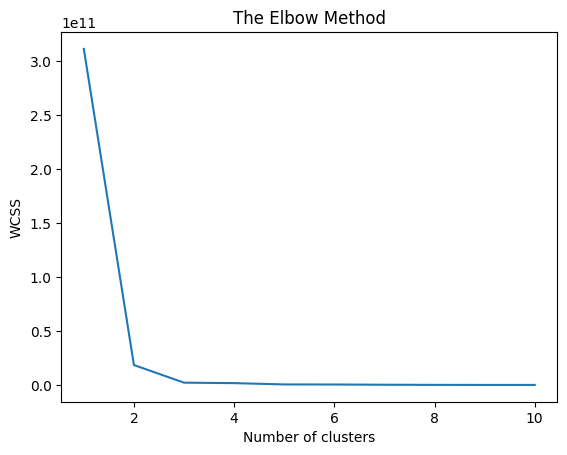

In [81]:
from sklearn.cluster import KMeans
# Menampilkan hasil Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cleaned_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [75]:
# Menggunakan KMeans untuk clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(cleaned_data)  # Gunakan cleaned_data yang sudah dibersihkan

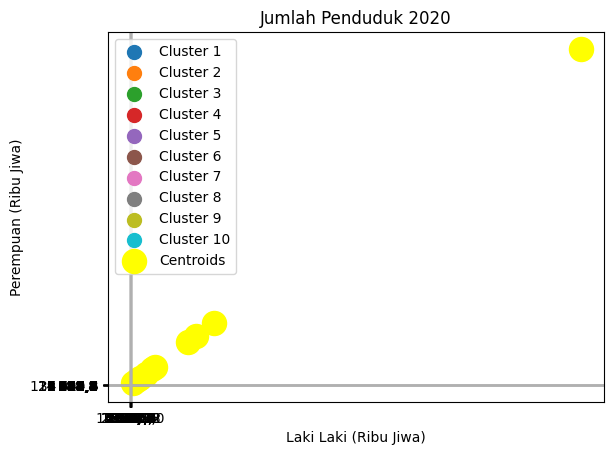

In [79]:
import matplotlib.pyplot as plt

# Pastikan X adalah cleaned_data jika Anda menggunakan cleaned_data untuk clustering
# X = cleaned_data  # Uncomment this line if you are using cleaned_data

# Memastikan bahwa y_kmeans memiliki jumlah cluster yang sesuai
n_clusters = kmeans.n_clusters  # Ambil jumlah cluster dari model KMeans

# Plot setiap cluster
for i in range(n_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i + 1}')

# Plot centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Menambahkan judul dan label
plt.title('Jumlah Penduduk 2020')
plt.xlabel('Laki Laki (Ribu Jiwa)')
plt.ylabel('Perempuan (Ribu Jiwa)')
plt.legend()
plt.grid(True)  # Menambahkan grid untuk kemudahan visualisasi
plt.show()

In [80]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w = davies_bouldin_score(cleaned_data, y_kmeans)  # Gunakan cleaned_data
print("Score Davies-Bouldin:")
print(w)

Score Davies-Bouldin:
0.27348435254733366
